In [77]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import requests
from urllib.parse import urlencode

from fbprophet import Prophet

In [78]:
# Чтение данных из облака
def download_link(public_key):

    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url

In [79]:
avocado_df = pd.read_csv(download_link('https://disk.yandex.ru/d/EE0tMXFNgz7Wlg'), parse_dates=['Date'])
avocado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [80]:
avocado_df = avocado_df.rename(columns={'Date': 'ds',
                                        'AveragePrice': 'y'})\
    .query("region == 'NewYork' & type == 'organic'")[['ds', 'y']]\
    .reset_index(drop=True)


In [95]:
prediction = 30

pred_df = avocado_df[:-prediction]

In [96]:
my_model = Prophet(weekly_seasonality=True, yearly_seasonality=True, growth='linear')
my_model.fit(pred_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.44191


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80       310.007   0.000277973       81.0557   3.275e-06       0.001      155  LS failed, Hessian reset 
      99       310.025   4.88741e-06       85.3111      0.4354      0.4354      179   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       310.042   1.27442e-08       55.8946      0.4752      0.4752      282   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [114]:
future_periods = my_model.make_future_dataframe(periods=30)

In [98]:
prediction = my_model.predict(future_periods)

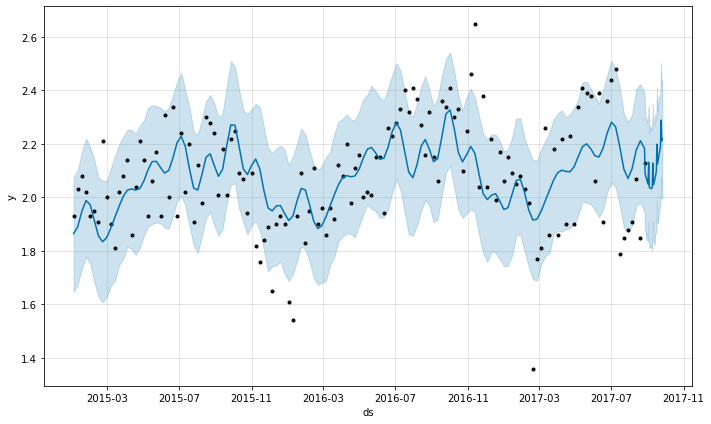

In [99]:
my_model.plot(prediction);

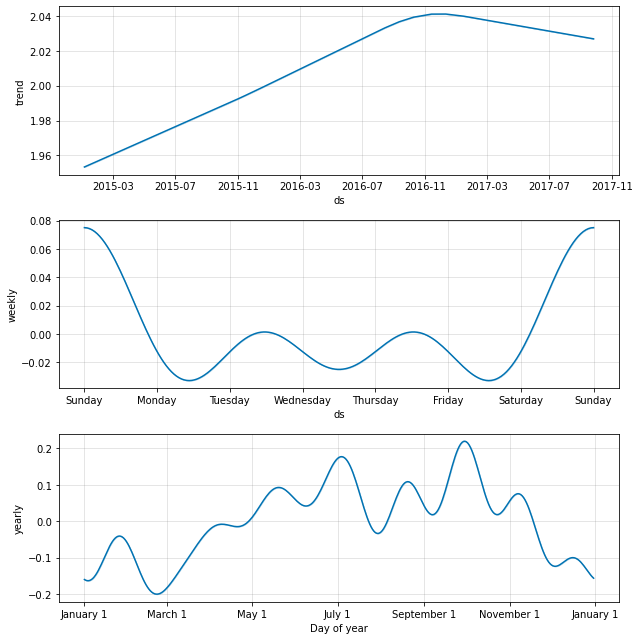

In [100]:
my_model.plot_components(prediction);